
## Objectifs
##### 1 Lire et traiter des données d'entrée avec [PANDAS](https://pandas.pydata.org/)

##### 2 Représenter la distribution empirique des "fold-change" (**FC**) vs Précision, aka: volcano-plot
    
##### 3 Effectuer une analyse de sur-représentation en termes GO


## Ressources : Rappels et illustration de l'analyse de représentation de termes GO
###### [TP de MADP](https://github.com/glaunay/tp-proteomics#3-obtention-des-param%C3%A8tres-du-mod%C3%A8le)
###### [Fiche Bioconductor](https://www.bioconductor.org/help/course-materials/2015/SeattleApr2015/E_GeneSetEnrichment.html)



### Préparation de  l'environnement

##### Please `pip install -r requirements.txt` first

##### Directory Configuration

* `workDir` points to the Git project, holds the *tsv* file
* `libDir` points to Git project subdirectory hosting python library with files names `go.py  stat_utils.py  uniprot.py`
* `dataDir` points to the data folder with uniprot and GO files

In [30]:
import sys, os
workDir = f"{os.getcwd()}"
libDir = f"{workDir}/lib"
dataDir= f"{workDir}/data" 

sys.path.append(libDir)

In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

## Jeux de données
* Jeux de données de protéomique quantitative au format TSV
* Ontologie GO au format [owl](http://www.obofoundry.org/ontology/go.html)
* Entrées Uniprot au format XML
    * Protéines de l'étude
    * Protéome d'E.Coli complet
    
<hr style="border:1px solid gray"> </hr>

### Lecture des valeurs experimentales
Charger ```TCL_wt1.tsv``` dans une [dataframe pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ 
Retirer les lignes présentant des aberrations numériques
</span>
<br/><span style="color:firebrick;font-weight:bold">$\rhd$ Attention aux types des colonnes !</span>

In [98]:
TCL_wt1 = pd.read_csv('./TCL_wt1.tsv', sep='\t', na_values=['#VALEUR!'], dtype={0:str, 1:str, 3:str, 4:float, 5:float, 6:float}).dropna()
TCL_wt1

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),LOG10 Adj.P-val
0,P75936,Basal-body rod modification protein FlgD OS=Es...,flgD,0.075816993,-3.721335,0.000055,4.260067
1,P76231,Uncharacterized protein YeaC OS=Escherichia co...,yeaC,0.092810458,-3.429569,0.000351,3.454627
2,P0A8S9,Flagellar transcriptional regulator FlhD OS=Es...,flhD,0.102614379,-3.284695,0.000027,4.571899
4,P05706,PTS system glucitol/sorbitol-specific EIIA com...,srlB,0.108496732,-3.204277,0.019963,1.699768
5,P29744,Flagellar hook-associated protein 3 OS=Escheri...,flgL,0.124183007,-3.009460,0.036746,1.434787
...,...,...,...,...,...,...,...
2011,P77330,Prophage lipoprotein Bor homolog OS=Escherichi...,borD,1.535947712,0.619129,0.310725,0.507623
2016,P02930,Outer membrane protein TolC OS=Escherichia col...,tolC,1.552287582,0.634396,0.013373,1.873757
2020,P0A917,Outer membrane protein X OS=Escherichia coli (...,ompX,1.579738562,0.659686,0.002226,2.652391
2021,P02931,Outer membrane protein F OS=Escherichia coli (...,ompF,1.754901961,0.811390,0.000068,4.164956


##### 1. Un premier volcano-plot

Ce type de figure représente pour chaque protéine en abscisse le taux d'abondance et en ordonnée la précision de la mesure.

<span style="color:firebrick;font-weight:bold">$\rhd$ 1. Réaliser un scatter plot matplotlib avec</span>
<br/><span style="color:firebrick;font-weight:bold">- en x, `Log2 Corrected Abundance Ratio`</span>
<br/><span style="color:firebrick;font-weight:bold">-  en y, `LOG10 Adj.P-val`</span>

<span style="color:firebrick;font-weight:bold">$\rhd$Vous légenderez les axes, attention `LOG10 Adj.P-val` est en fait `-LOG10 Adj.P-val`, regardez bien.</span>

Text(0.5, 0.98, 'Volcano plot of Log2 Corrected abundance ratio relative to the adjusted p-val')

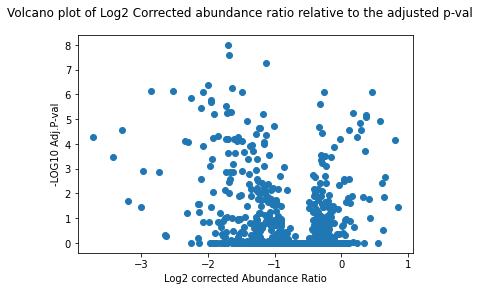

In [5]:
figvolc, axvolc = plt.subplots()
axvolc.scatter(TCL_wt1['Log2 Corrected Abundance Ratio'],TCL_wt1['LOG10 Adj.P-val'])
axvolc.set_xlabel('Log2 corrected Abundance Ratio')
axvolc.set_ylabel('-LOG10 Adj.P-val')
figvolc.suptitle('Volcano plot of Log2 Corrected abundance ratio relative to the adjusted p-val')

##### 2. Réaliser des versions évoluées du graphique précédent
L'objectif est de mettre l'accent sur la région **-Log10 adj Pvalue > 4** et **Log2 corrected abundance ratio > 0**.
<br/>Pour cela vous revisiterez le scatter plot précedent au travers des versions suivantes:
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ première version : un rectangle de la couleur de votre choix matérialisera la région</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ deuxième version  : une couleur de votre choix représentera les points de la région</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ troisème version (optionnel): Les identifiants uniprot remplaceront les points des protéines de la région</span>

In [6]:
import pyproteinsExt

In [7]:

import matplotlib.patches as mpatches

In [8]:
patch_cond = mpatches.Rectangle((0,4),1,4, color='red', alpha=0.3)

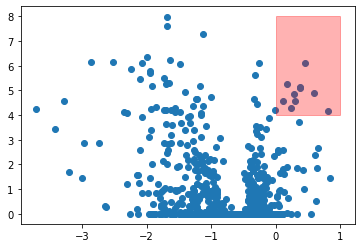

In [9]:
figpatch, axpatch = plt.subplots()
pval = TCL_wt1['LOG10 Adj.P-val']
ab = TCL_wt1['Log2 Corrected Abundance Ratio']
axpatch.scatter(ab,pval)
axpatch.add_patch(patch_cond)

In [10]:
colors = []

for pval, ab in zip(TCL_wt1.iloc[:,6], TCL_wt1.iloc[:,4]) :
    if pval > 4 and ab > 0 :
        colors.append('r')
    else :
        colors.append('tab:blue')

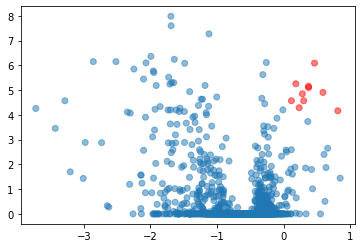

In [11]:
fig3, ax3 = plt.subplots()
ax3.scatter(TCL_wt1['Log2 Corrected Abundance Ratio'],TCL_wt1['LOG10 Adj.P-val'], c=colors, alpha= 0.5)

In [12]:
df_blue = TCL_wt1[(TCL_wt1['Log2 Corrected Abundance Ratio']<0) | (TCL_wt1['LOG10 Adj.P-val']<4) ]

In [13]:
df_red = TCL_wt1[(TCL_wt1['Log2 Corrected Abundance Ratio']>0) & (TCL_wt1['LOG10 Adj.P-val']>4) ]

In [14]:
patch_cond = mpatches.Rectangle((0,4),1,4, color='red', alpha=0.3)

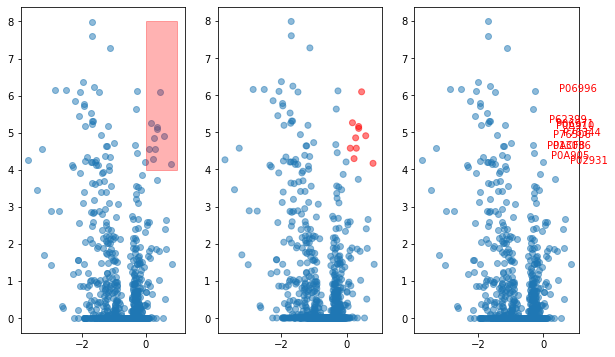

In [15]:
fig4, ax6 = plt.subplots(1,3,figsize=(10,6))
ax6[0].scatter(TCL_wt1['Log2 Corrected Abundance Ratio'],TCL_wt1['LOG10 Adj.P-val'], alpha = 0.5)
ax6[0].add_patch(patch_cond)
ax6[1].scatter(TCL_wt1['Log2 Corrected Abundance Ratio'],TCL_wt1['LOG10 Adj.P-val'], c=colors, alpha= 0.5)
ax6[2].scatter(df_blue['Log2 Corrected Abundance Ratio'],df_blue['LOG10 Adj.P-val'], alpha= 0.5)
for x, y,text in zip(df_red['Log2 Corrected Abundance Ratio'], df_red['LOG10 Adj.P-val'], df_red['Accession']) :
    ax6[2].text(x,y, text, color='red')

#### Analyse ORA

##### Principes
Vous disposez d'un objet analyser permettant de réaliser une analyse de la sur-représentation (**ORA**) en termes GO parmi une liste de protéine d'intérêt.
La fréquence des termes GO dans le protéome totale est utilisée comme référence.

L'objet analyser s'instancie ainsi
```python
from stat_utils import GO_ORA_analyser
o = GO_ORA_analyser(f"{dataDir}/go.owl", f"{dataDir}/K12_proteome", f"{dataDir}/dataset")
```

Il fournit une méthode pour chaque catégorie de termes GO
<i>{ biological_process, molecular_function, cellular_component }</i>

Une éventuelle surreprésentation des termes GO de la catégorie <i>biological_process</i> est par exemple calculée parmi les protéines P29744 et P05706 de la façon suivante:

```python
goTerm_scores = o.biological_process(["P29744", "P05706"])
```
<span style="color:green;font-weight:bold">$\uparrow$ Reproduire cet exemple dans la cellule ci-dessous.$\downarrow$ </span>
</br><span style="color:firebrick;font-weight:bold"> $\rhd$ Inspecter l'objet retourné par la méthode o.biological_process, que voyez-vous ?</span>

In [63]:
from stat_utils import GO_ORA_analyser
o = GO_ORA_analyser(f"{dataDir}/go.owl", f"{dataDir}/K12_proteome", f"{dataDir}/dataset")

Loading ontology
Loaded
Reading whole proteome
4391 Loaded
reading experimental protein set
2024 Loaded


###### 2/ Analyser la représentation des termes GO parmi les protéines surabondantes de l'experience
<span style="color:firebrick;font-weight:bold"> $\rhd$ Vous devrez extraire les identifiants uniprot des protéines aux `Log2 Corrected Abundance Ratio` supérieurs au seuil alpha de 5%.</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ Vous conduirez sur cette liste de protéines une analyse de sur-représentation en termes GO à l'aide d'un objet *GO_ORA_analyser*.</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ Vous pouvez faire varier le seuil d'abondance autour de la valeur alpha.</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ Vous traiterez les 3 catégories *biological_process / molecular_function /cellular_component*.</span>



Familiarisez-vous avec la structures des dictionnaires de résultas, vous pouvez [les sauvegarder au format json](https://docs.python.org/3/library/json.html).


In [68]:
selected = TCL_wt1[(TCL_wt1.iloc[:,4]<-0.09)] # Séléction des protéines au seuil d'abondance < alpha

#Analyse par GO_ORA_Analyzer
bio_process = o.biological_process(selected.iloc[:,0].tolist())
mol_func = o.molecular_function(selected.iloc[:,0].tolist())
cell_comp = o.cellular_component(selected.iloc[:,0].tolist())

Evaluated 2185 / 2185 Pathways, based on 1680 proteins
molecular function process GO Tree
Extracting molecular function ontology
Applying true path collapsing
1655 GO terms, 4180 leaves, 1466 proteins
Extracting molecular function ontology
Applying true path collapsing
2264 GO terms, 7807 leaves, 3118 proteins
Evaluated 1654 / 1654 Pathways, based on 1680 proteins
cellular component process GO Tree
Extracting cellular component ontology
Applying true path collapsing
207 GO terms, 2193 leaves, 1359 proteins
Extracting cellular component ontology
Applying true path collapsing
239 GO terms, 4698 leaves, 2805 proteins
Evaluated 206 / 206 Pathways, based on 1680 proteins


In [230]:
bio_process_df = pd.DataFrame(bio_process, columns=["p_value", "GO_term",  "GO_access", "Proteins_accessions"])
bio_process_df.iloc[8,:]

p_value                                                         0.001379
GO_term                                     nucleotide metabolic process
GO_access                                                     GO:0009117
Proteins_accessions    [P52061, P25536, P0A729, P0AGG2, P69451, P0A6A...
Name: 8, dtype: object

## Une première application: représentation riche du résultat de l'analyse


### Mise en forme "riche" des résultats grâce au notebook

Jupyter permet d'étendre le concept de la méthode **__str__()** afin de produire du contenu HTML.
 Ainsi, tout objet impémentant une méthode **_repr_html_()** sera affiché, via son rendu HTML, dans la cellule d'un notebook.

```python
class Point():
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    def _repr_html_(self):
        htmlString = "<table><thead><tr><td>Abscisse</td><td>Ordonnée</td><td>Cote</td></tr></thead>"
        htmlString += f"<tbody><tr><td>{self.x}</td><td>{self.y}</td><td>{self.z}</td></tr></tbody></table>"
        return htmlString
Point(2,3,4)
```
Affichera

![caption](./figs/reprhtml.png)


### Intégration des résultats à la visualisation du notebook 

En vous inspirant de la fonction ci-dessus, implémenter une classe Rich_GO_ORA dont la méthode [`_repr_html_`](https://ipython.readthedocs.io/en/stable/config/integrating.html) permettra un affichage plus lisible d'une des analyses `biological_process / molecular_function /cellular_component`

Un exemple possible est,
![caption](./figs/_repr_html_.png)

(Bonus): clicker sur le nom du terme GO envoie vers sa description.
Pour cela, afficher le nom du pathway dans une balise hyperlien pour permettre d'acceder à la page de description du terme GO. 

Les termes GO sont accessibles aux URL de la forme
`http://amigo.geneontology.org/amigo/term/GO:GO_NUMBER`.




In [124]:
class Rich_GO_ORA():
    def __init__(self, pval, GO, n):
        self.pvalue = pval
        self.GO = GO
        self.n = n
    def _repr_html_(self):
        htmlString = "<table><thead><tr><td>p-value</td><td>Pathway name</td><td>n</td></tr></thead>"
        for pval_i, GO_i, n_i in zip(self.pvalue.tolist(), self.GO.tolist(),self.n.tolist()) :
            htmlString += f"<tbody><tr><td>{pval_i}</td><td>{GO_i}</td><td>{len(n_i)}</td></tr>"
        htmlString += "</tbody></table>"
        return htmlString
Rich_GO_ORA(bio_process_df.iloc[:,0],bio_process_df.iloc[:,1], bio_process_df.iloc[:,3] )

p-value,Pathway name,n
2.575389713419983e-06,organonitrogen compound biosynthetic process,544
7.653095494218463e-05,small molecule biosynthetic process,314
0.00029906439310725604,amide biosynthetic process,185
0.00035048051075160563,cellular amide metabolic process,209
0.0011094445681064055,carboxylic acid biosynthetic process,220
0.0011094445681064055,organic acid biosynthetic process,220
0.0013343211187077369,peptide metabolic process,156
0.0013638822444871608,ribonucleotide metabolic process,88
0.0013791614264801984,nucleotide metabolic process,137
0.001414028601579211,ribose phosphate metabolic process,90


## Une deuxième application: volcano plot améliorés
###### PANDAS
En choisissant comme seuil la valeur `alpha` du TP précédent, veuillez extraires les identifiants uniprot des protéines sur-abondantes (rappel les valeurs d'abondance sont celles de la colonne `Log2 Corrected Abundance Ratio`).

Vous devrez avoir dans des listes distinctes:
* identifiants uniprot
* `Log2 Corrected Abundance Ratio`
* `LOG10 Adj.P-val'`

###### Représentation graphiques
* Pour la catégorie de termes GO (biological_process / molecular_function /cellular_component) de votre choix
    * Générer une grille de 4 graphiques 
    * Dans chaque graphique colorez dans une couleur différentes les protéines porteuses de 4 termes de GO que vous estimez les plus pertinents 
    * Donnez le nom de la catégorie générale à la grille
    * Donnez le nom du terme GO représenté dans chaque graphique avec une couleur de titre cohérente.
    

In [227]:
#organonitrogen compound biosynthetic process
GO_1 = bio_process_df.iloc[0,3] # Selection de la liste de protéines associées avec 
#small molecule biosynthetic process
GO_2 = bio_process_df.iloc[8,3]
#amide biosynthetic process 
GO_3 = bio_process_df.iloc[-1,3]
#cellular amide metabolic process
GO_4 = bio_process_df.iloc[50,3]

In [228]:
uniprot_id = selected.iloc[:,0].tolist()
log2_corr_abrat= selected.iloc[:,4].tolist()
log10_adj_pval = selected.iloc[:,-1].tolist()
col_GO_1 = []
col_GO_2 = []
col_GO_3 = []
col_GO_4 = []

for prot_name in uniprot_id :
    if prot_name in GO_1:
        col_GO_1.append("g")
        col_GO_2.append("tab:blue")
        col_GO_3.append("tab:blue")
        col_GO_4.append("tab:blue")
    elif prot_name in GO_2 :
        col_GO_1.append("tab:blue")
        col_GO_2.append("m")
        col_GO_3.append("tab:blue")
        col_GO_4.append("tab:blue")  
    elif prot_name in GO_3 :
        col_GO_1.append("tab:blue")
        col_GO_2.append("tab:blue")
        col_GO_3.append("y")
        col_GO_4.append("tab:blue")  
    elif prot_name in GO_4 :
        col_GO_1.append("tab:blue")
        col_GO_2.append("tab:blue")
        col_GO_3.append("tab:blue")
        col_GO_4.append("red")  
    else : 
        col_GO_1.append("tab:blue")
        col_GO_2.append("tab:blue")
        col_GO_3.append("tab:blue")
        col_GO_4.append("tab:blue") 

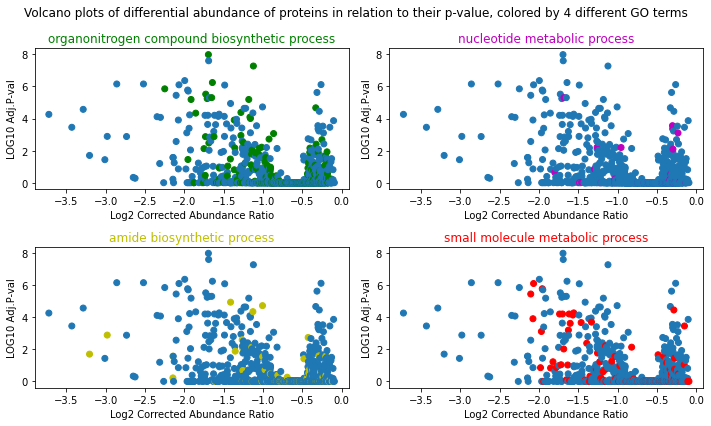

In [231]:
fig, ax = plt.subplots(2,2, figsize=(10,6))
fig.suptitle("Volcano plots of differential abundance of proteins in relation to their p-value, colored by 4 different GO terms")
ax[0,0].scatter(log2_corr_abrat, log10_adj_pval, c=col_GO_1)
ax[0,0].set_title("organonitrogen compound biosynthetic process", color = "g")
ax[0,0].set_xlabel('Log2 Corrected Abundance Ratio')
ax[0,0].set_ylabel('LOG10 Adj.P-val')

ax[0,1].scatter(log2_corr_abrat, log10_adj_pval, c=col_GO_2)
ax[0,1].set_title("nucleotide metabolic process", color = "m")
ax[0,1].set_xlabel('Log2 Corrected Abundance Ratio')
ax[0,1].set_ylabel('LOG10 Adj.P-val')

ax[1,0].scatter(log2_corr_abrat, log10_adj_pval, c=col_GO_3)
ax[1,0].set_title("amide biosynthetic process", color = "y")
ax[1,0].set_xlabel('Log2 Corrected Abundance Ratio')
ax[1,0].set_ylabel('LOG10 Adj.P-val')

ax[1,1].scatter(log2_corr_abrat, log10_adj_pval, c=col_GO_4)
ax[1,1].set_title("small molecule metabolic process", color="r")
ax[1,1].set_xlabel('Log2 Corrected Abundance Ratio')
ax[1,1].set_ylabel('LOG10 Adj.P-val')
fig.tight_layout()